In [1]:
import xgboost
import shap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import tensorflow as tf

df = pd.read_csv("C:\\Users\\Nicol\\Desktop\\bike_rental.csv")

c:\Users\Nicol\anaconda3\envs\tensorflow\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
X = df.drop(columns=['cnt'])
y = df['cnt']

In [3]:
np.random.seed(42)
tf.random.set_seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting
model1 = xgboost.XGBRegressor(random_state=42).fit(X_train,y_train)

# NN
model2 = Sequential()
model2.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dense(1))
model2.compile(loss='mse', optimizer='adam')
model2.fit(X_train, y_train, epochs=50)

Epoch 1/50
435/435 [==============================] - 1s 3ms/step - loss: 30892.7969
Epoch 2/50
435/435 [==============================] - 1s 3ms/step - loss: 28918.2461
Epoch 3/50
435/435 [==============================] - 1s 2ms/step - loss: 27546.4590
Epoch 4/50
435/435 [==============================] - 1s 2ms/step - loss: 26276.6191
Epoch 5/50
435/435 [==============================] - 1s 2ms/step - loss: 25426.0332
Epoch 6/50
435/435 [==============================] - 1s 3ms/step - loss: 24865.4590
Epoch 7/50
435/435 [==============================] - 1s 2ms/step - loss: 24795.1621
Epoch 8/50
435/435 [==============================] - 1s 2ms/step - loss: 24574.5859
Epoch 9/50
435/435 [==============================] - 1s 2ms/step - loss: 24308.7773
Epoch 10/50
435/435 [==============================] - 1s 2ms/step - loss: 24297.5176
Epoch 11/50
435/435 [==============================] - 1s 2ms/step - loss: 24100.0059
Epoch 12/50
435/435 [==============================] - 1s 2ms/s

In [4]:
# Predicting results

preds1 = model1.predict(X)
preds2 = model2.predict(X)

explainer1 = shap.Explainer(model1)
explainer2 = shap.DeepExplainer(model2, X.values)

shap_values1 = explainer1(X)
shap_values2 = explainer2.shap_values(X.values)


keras is no longer supported, please use tf.keras instead.
You have provided over 5k background samples! For better performance consider using smaller random sample.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [ ]:
'''
with open("XGB_vs_NN.txt", "w") as f:
    for i in range(0, len(y)):
        f.write(str(preds1[i]))
        f.write(", ")
        f.write(str(preds2[i]))
        f.write("\n")
'''

In [5]:
# Normalizing data

from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Apply the scaler to every column in the dataframe
stdDf = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

stdX = stdDf.drop(columns=['cnt'])
stdY = stdDf['cnt']


In [6]:
stdX_train, stdX_test, stdy_train, stdy_test = train_test_split(stdX, stdY, test_size=0.2, random_state=42)

# Gradient Boosting
stdmodel1 = xgboost.XGBRegressor(random_state=42).fit(stdX_train,stdy_train)

# NN
stdmodel2 = Sequential()
stdmodel2.add(Dense(64, input_dim=stdX_train.shape[1], activation='relu'))
stdmodel2.add(Dense(1))
stdmodel2.compile(loss='mse', optimizer='adam')
stdmodel2.fit(stdX_train, stdy_train, epochs=50)

Epoch 1/50
435/435 [==============================] - 1s 2ms/step - loss: 0.0238
Epoch 2/50
435/435 [==============================] - 1s 3ms/step - loss: 0.0173
Epoch 3/50
435/435 [==============================] - 1s 2ms/step - loss: 0.0162
Epoch 4/50
435/435 [==============================] - 1s 2ms/step - loss: 0.0155
Epoch 5/50
435/435 [==============================] - 1s 2ms/step - loss: 0.0145
Epoch 6/50
435/435 [==============================] - 1s 2ms/step - loss: 0.0135
Epoch 7/50
435/435 [==============================] - 1s 2ms/step - loss: 0.0130
Epoch 8/50
435/435 [==============================] - 1s 2ms/step - loss: 0.0125
Epoch 9/50
435/435 [==============================] - 1s 2ms/step - loss: 0.0119
Epoch 10/50
435/435 [==============================] - 1s 2ms/step - loss: 0.0115
Epoch 11/50
435/435 [==============================] - 1s 2ms/step - loss: 0.0112
Epoch 12/50
435/435 [==============================] - 1s 2ms/step - loss: 0.0110
Epoch 13/50
435/435 [====

In [7]:
stdpreds1 = model1.predict(stdX)
stdpreds2 = model2.predict(stdX)

stdexplainer1 = shap.Explainer(stdmodel1)
stdexplainer2 = shap.DeepExplainer(stdmodel2, stdX.values)

stdshap_values1 = explainer1(stdX)
stdshap_values2 = explainer2.shap_values(stdX.values)

You have provided over 5k background samples! For better performance consider using smaller random sample.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [8]:
'''
max_y = max(y)
for i in range(0, len(y)):
    pred1[i] = pred1[i] / max_y
    preds2[i] = preds2[i] / max_y
'''
    
with open("bike_rental_XBG_NN.txt", "w") as f:
    # header
    f.write("XGBoost , NN")
    colNames = list(df.columns)
    for el in colNames:
        f.write(", ")
        f.write(el)
    for i in range(0, len(y)):
        f.write(str(preds1[i]))
        f.write(", ")
        f.write(str(preds2[i]))
        f.write(", ")
        tmp_lst1 = []
        tmp_lst2 = []
        for j in range(0, len(shap_values1[i].values)):
            tmp_lst1.append(str(shap_values1[i].values[j]))
            tmp_lst1.append(", ")
        tmp_strng1 = ''.join(tmp_lst1)
        f.write(tmp_strng1)
        tmp_lst2 = []
        for j in range(0, len(shap_values2[0][i])):
            tmp_lst2.append(str(shap_values2[0][i][j]))
            tmp_lst2.append(", ")
        tmp_strng2 = ''.join(tmp_lst2)
        nw_ts2 = tmp_strng2[:-2]
        f.write(nw_ts2)
        f.write("\n")

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [10]:
N = len(X)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [11]:
shap_diffs = []
for i in range(0, len(y)):
    cur_shaps = []
    for j in range(0,len(shap_values1[i].values)):
        cur_d = shap_values1[i].values[j] - shap_values2[0][i][j]
        cur_shaps.append(cur_d)
    shap_diffs.append(cur_shaps)

In [12]:
df_shap = pd.DataFrame(shap_diffs)
feature_names = list(X.columns)
df_shap.columns = feature_names

In [13]:
# Load libraries and modules
import pandas as pd
from sklearn import preprocessing
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.linear_model import LinearRegression
from sklearn.metrics.cluster import normalized_mutual_info_score
import os
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [14]:
from sklearn.metrics import silhouette_score

# Extract the features into X
X1 = df_shap.iloc[:, 1:].values

# Calculate the silhouette score for different numbers of clusters
scores = []
for n_clusters in range(2, 20):
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X1)
    silhouette_avg = silhouette_score(X1, cluster_labels)
    scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

# Find the optimal number of clusters
optimal_n_clusters = np.argmax(scores) + 2
print("Optimal number of clusters =", optimal_n_clusters)


For n_clusters = 2 The average silhouette_score is : 0.4598408105595108
For n_clusters = 3 The average silhouette_score is : 0.3768056459127599
For n_clusters = 4 The average silhouette_score is : 0.3617922435546439
For n_clusters = 5 The average silhouette_score is : 0.2980399424269309
For n_clusters = 6 The average silhouette_score is : 0.3142109649732145
For n_clusters = 7 The average silhouette_score is : 0.27888336916184814
For n_clusters = 8 The average silhouette_score is : 0.2556141611436044
For n_clusters = 9 The average silhouette_score is : 0.2435316005741656
For n_clusters = 10 The average silhouette_score is : 0.2326412412469183
For n_clusters = 11 The average silhouette_score is : 0.23147644599389727
For n_clusters = 12 The average silhouette_score is : 0.22800327055199762
For n_clusters = 13 The average silhouette_score is : 0.20984135025666717
For n_clusters = 14 The average silhouette_score is : 0.2066992134318448
For n_clusters = 15 The average silhouette_score is : 0

In [15]:
kmeans = KMeans(n_clusters=optimal_n_clusters)
kmeans.fit(df_shap)
labels=kmeans.labels_
df_shap['cluster'] = labels
print(kmeans.cluster_centers_)

[[ 2.64929702e-01  4.89679954e-01 -4.50407909e-04 -2.87322123e-01
  -6.31632743e+01 -7.37232277e-02 -4.14883658e-01 -8.58745986e+00
   3.98506908e-02 -6.42284267e-01 -1.68277568e+00  1.83041788e-01
   4.09828007e-01]
 [ 1.33587641e+00  2.85834711e-01  8.48354169e-04 -9.30789391e-02
   1.22072988e+02  1.29522717e-01  1.59424518e+00  1.49690674e+01
  -2.91072754e-01 -3.68545762e-01 -3.36177335e+00  8.32988986e-01
  -1.79214919e+00]]


The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

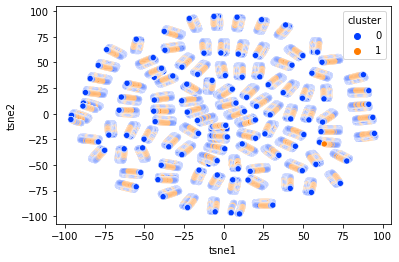

In [17]:
# t-SNE and scatterplot on original dataset, coloring it basing on cluster beloning

from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

df2 = pd.DataFrame(X_tsne, columns=['tsne1','tsne2'])
df2['label'] = y
df2['cluster'] = df_shap['cluster']

sns.scatterplot(data=df2, x='tsne1', y='tsne2', hue='cluster', palette='bright')


In [18]:
counts = df2['cluster'].value_counts()
print(counts)

0    11346
1     6033
Name: cluster, dtype: int64


The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


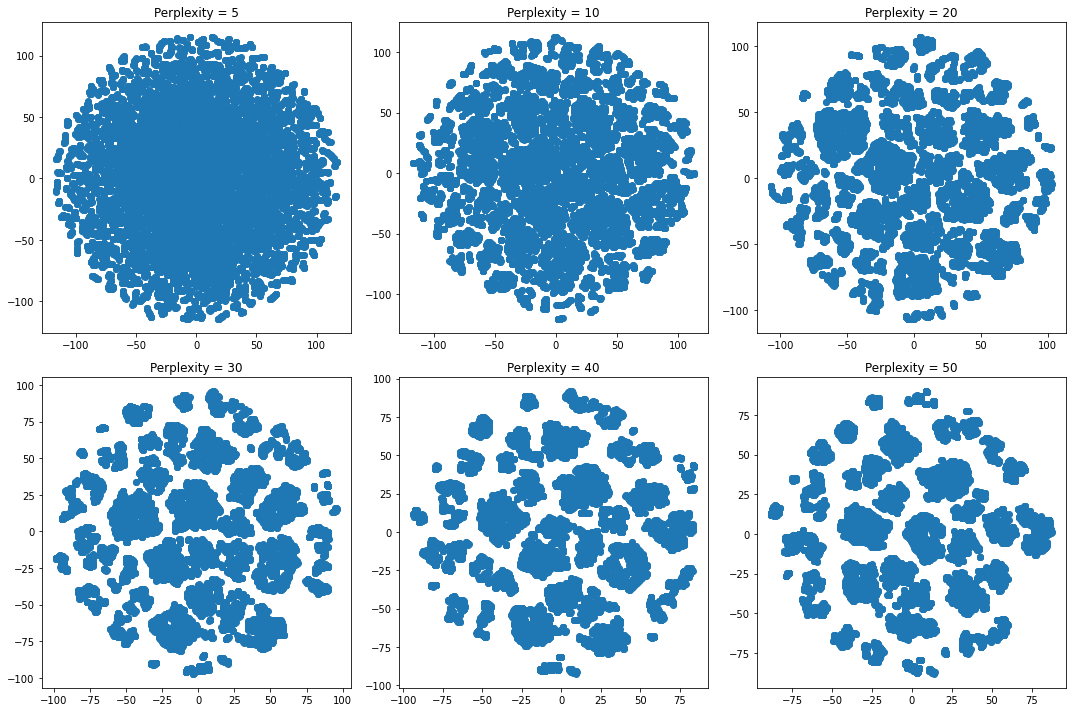

In [19]:
# Trying more perplexity values

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

perplexities = [5, 10, 20, 30, 40, 50]
X_tsne = {}
for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne[i] = tsne.fit_transform(stdX)

# plot the results
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.ravel()

for i, perplexity in enumerate(perplexities):
    axs[i].scatter(X_tsne[i][:, 0], X_tsne[i][:, 1])
    axs[i].set_title("Perplexity = {}".format(perplexity))

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

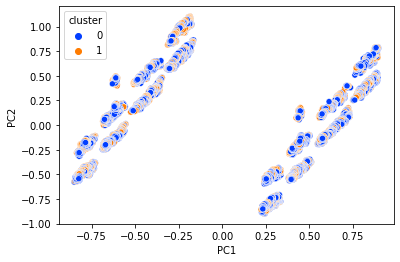

In [22]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import pandas as pd

# apply PCA on the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(stdX)

# create a pandas dataframe for the new dataset with 2 principal components
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = df_shap['cluster']

# plot the results
import seaborn as sns
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette='bright')


In [24]:
from sklearn.metrics import mean_squared_error

preds1 = model1.predict(X_test)
preds2 = model2.predict(X_test)

mse1 = mean_squared_error(y_test, preds1)
mse2 = mean_squared_error(y_test, preds2)

print("MSE1: {}, MSE2:{}".format(mse1, mse2))

MSE1: 1448.3283695021405, MSE2:19962.296889594152
